# Hello World Program for a Quantum Circuit

In [1]:
from qiskit import *

In [29]:
quantReg = QuantumRegister(2)

In [30]:
clReg = ClassicalRegister(2)

In [31]:
circuit = QuantumCircuit(quantReg, clReg)

In [32]:
circuit.draw()

q7_0: 
      
q7_1: 
      
c1: 2/

I am not using _circuit.draw(output = 'mpl')_ since I have not yet restarted the kernel with a fresh download of _pylatexenc_. For now I will have to make do with text based diagrams

In [33]:
circuit.h(quantReg[0])

In [34]:
circuit.cx(quantReg[0], quantReg[1])

In [35]:
circuit.draw()

┌───┐     
q7_0: ┤ H ├──■──
      └───┘┌─┴─┐
q7_1: ─────┤ X ├
           └───┘
c1: 2/══════════

In [36]:
circuit.measure(quantReg, clReg)

In [37]:
nativeSim = Aer.get_backend('qasm_simulator')

In [38]:
result = execute(circuit, backend = nativeSim).result()

In [39]:
from qiskit.tools.visualization import plot_histogram

# Result on the Native 'Ideal' Quantum Simulator

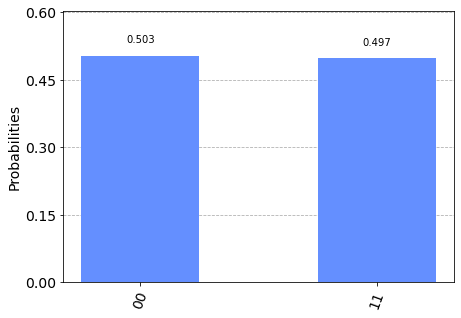

In [40]:
plot_histogram(result.get_counts(circuit))

In [41]:
IBMQ.load_account()

C:\Users\lenovo\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [42]:
quantProvider = IBMQ.get_provider()

In [44]:
quantumComputer = quantProvider.get_backend('ibmq_5_yorktown')

In [47]:
job = execute(circuit, backend = quantumComputer)

# Alternate State Vector Result

In [50]:
from qiskit.tools.visualization import plot_bloch_multivector

In [53]:
svSim = Aer.get_backend('statevector_simulator')

In [54]:
svResult = execute(circuit, backend = svSim).result()

In [55]:
stateVector = svResult.get_statevector()

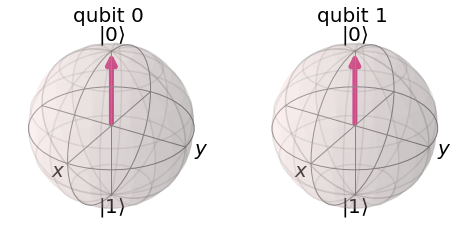

In [56]:
plot_bloch_multivector(stateVector)

# Result from an IBMQ Quantum Computer

In [45]:
from qiskit.tools.monitor import job_monitor

In [48]:
job_monitor(job)

Job Status: job has successfully run


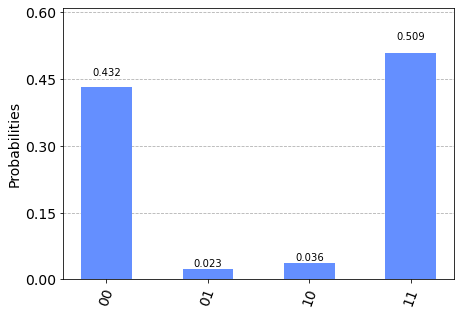

In [49]:
plot_histogram(job.result().get_counts(circuit))